# **WAZE PROJECT** 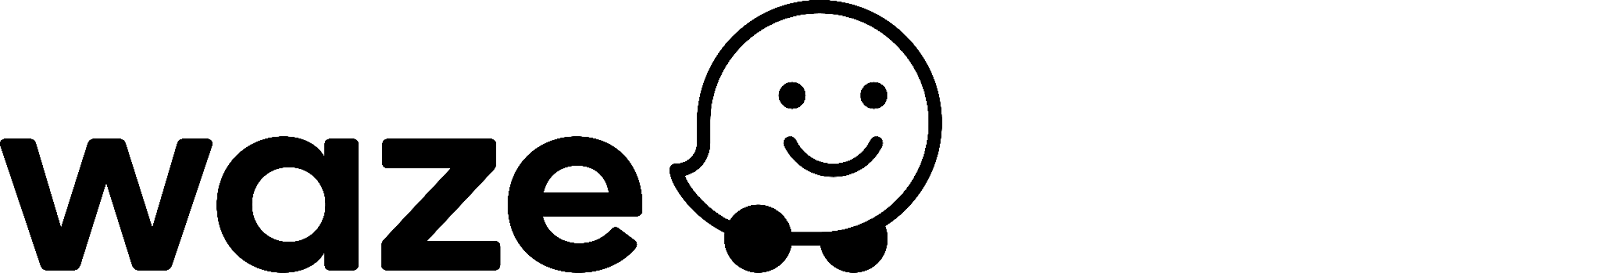
Project goal: 
 to develop a machine learning model to predict user churn. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. An accurate model will help prevent churn, improve user retention, and grow Waze’s business.

## **Inspect and analyze the data using EDA**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('waze_dataset.csv')

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The dataset has 700 missing values in the `label` column.

In [5]:
# Compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.
# Isolate rows with null values
null_df = df[df['label'].isnull()]

# Summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]

# Summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


> Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

In [7]:
# Get count of null values by device
null_df['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

> Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.
Now, of the rows with null values, calculate the percentage with each device&mdash;Android and iPhone.

In [8]:
# Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

How does this compare to the device ratio in the full dataset?

In [9]:
# Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

Examine the counts and percentages of users who churned vs. those who were retained. How many of each group are represented in the data?

In [10]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


This dataset contains 82% retained users and 18% churned users.

compare the medians of each variable for churned and retained users. As, the mean can be inaccurate due to outliers median can be more reliable measure in this case.

In [11]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

> Calculate the median kilometers per drive in the last month for both retained and churned users.

Begin by dividing the driven_km_driv s column by the drives column. Then, group the results by churned/retained and calculate the median km/drive of each group.

In [12]:
# Add a column to df called `km_per_drive`
df['km_per_drive'] = df['driven_km_drives'] / df['drives']

# Group by `label`, calculate the median, and isolate for km per drive
median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


The median retained user drove about one more kilometer per drive than the median churned user.

In [13]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for km per driving day
median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [14]:
# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_day'] = df['drives'] / df['driving_days']

# Group by `label`, calculate the median, and isolate for drives per driving day
median_drives_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs.

> Finally, examine whether there is an imbalance in how many users churned by device type.

In [15]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [16]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.

There is nothing suggestive of churn being correlated with device.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

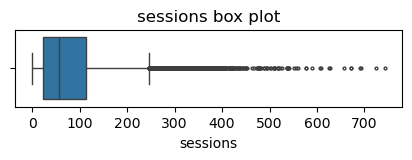

In [18]:
# Box plot of sessions variable
# sessions = The number of occurrences of a user opening the app during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=2)
plt.title('sessions box plot');

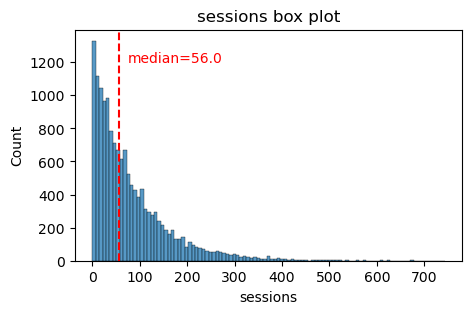

In [19]:
# Histogram of sessions variable
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

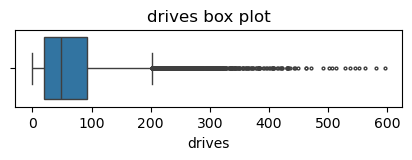

In [20]:
# box plot of drives variable
# drives = An occurrence of driving at least 1 km during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=2)
plt.title('drives box plot');

In [21]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            
    plt.axvline(median, color='red', linestyle='--')         
    if median_text==True:                                   
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

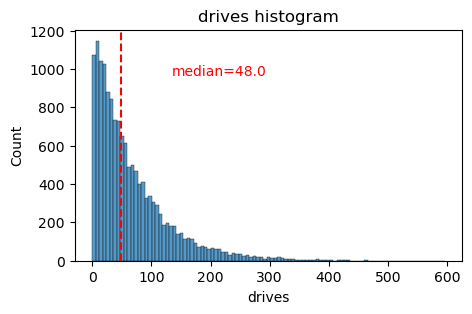

In [22]:
# histogram for `drives` variable
histogrammer('drives')

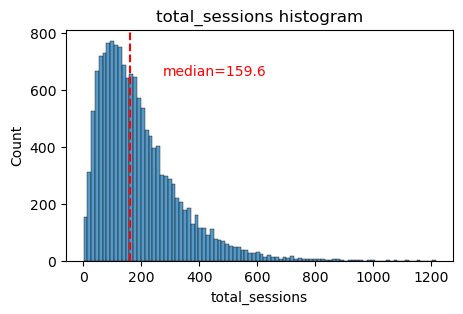

In [23]:
# histogram of `total_sessions`
# total_sessions = A model estimate of the total number of sessions since a user has onboarded
histogrammer('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month. This is something you can examine more closely later.

The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

Median: 1741.0


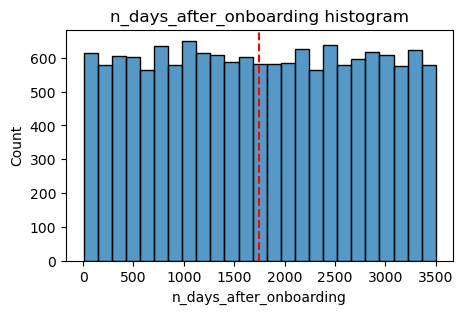

In [24]:
# histogram of `n_days_after_onboarding`
# n_days_after_onboarding = The number of days since a user signed up for the app
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to 3,500 
(~9.5 years).

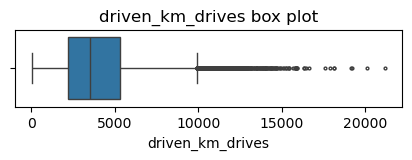

In [25]:
# box plot for `driven_km_drives`
# driven_km_drives = Total kilometers driven during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=2)
plt.title('driven_km_drives box plot');

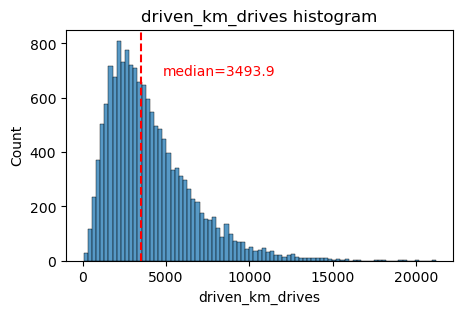

In [26]:
# histogram for `driven_km_drives`
histogrammer('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,494 kilometers.

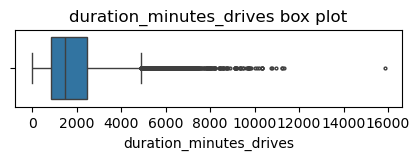

In [27]:
# box plot for `duration_minutes_drives`
# duration_minutes_driven = Total duration driven in minutes during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=2)
plt.title('duration_minutes_drives box plot');

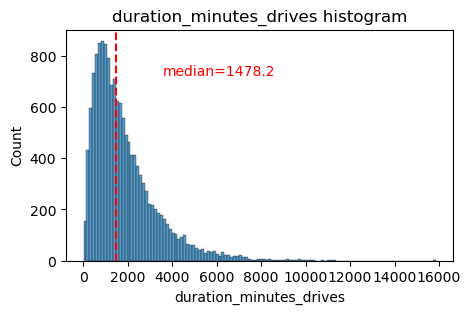

In [28]:
# histplot for `duration_minutes_drives`
histogrammer('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

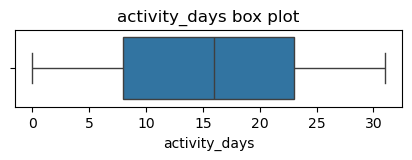

In [29]:
# box plot for `activity_days`
# activity_days = Number of days the user opens the app during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

Median: 16.0


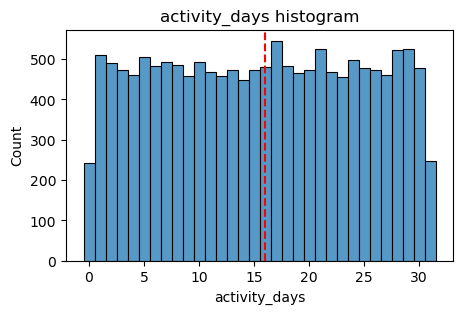

In [30]:
# histplot for `activity_days`
histogrammer('activity_days', median_text=False, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

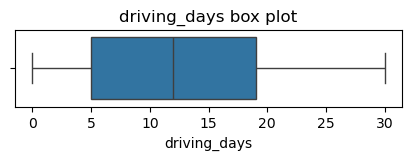

In [31]:
# box plot for `driving_days`
# Number of days the user drives (at least 1 km) during the month
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

Median: 12.0


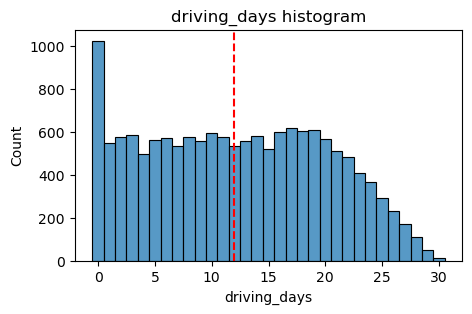

In [32]:
# Histogram for `driving_days`
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.

However, there were almost twice as many users (~1,000 vs. ~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from activity_days. That variable had ~500 users opening the app on each of most of the day counts, but there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

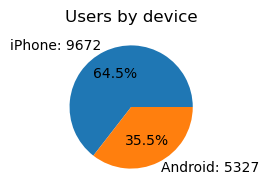

In [33]:
# pie chart for `device` categorical variable
# device = the type of device a user starts a session with
plt.figure(figsize=(3,2))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

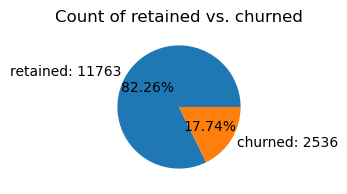

In [34]:
# pie chart for `label` categorical variable
# label = Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month
plt.figure(figsize=(3,2))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.2f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

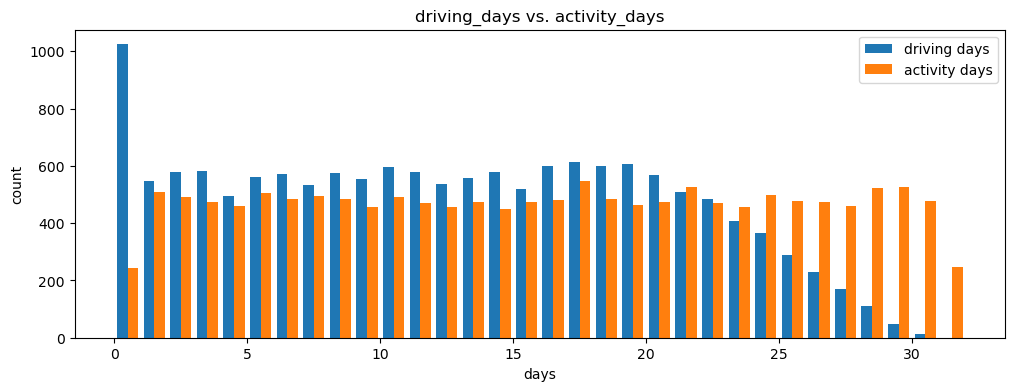

In [35]:
# histogram comparing `driving-days` and `activity_days`
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

In [36]:
# Confirm the maximum number of days for each variable—`driving_days` and `activity_days`
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

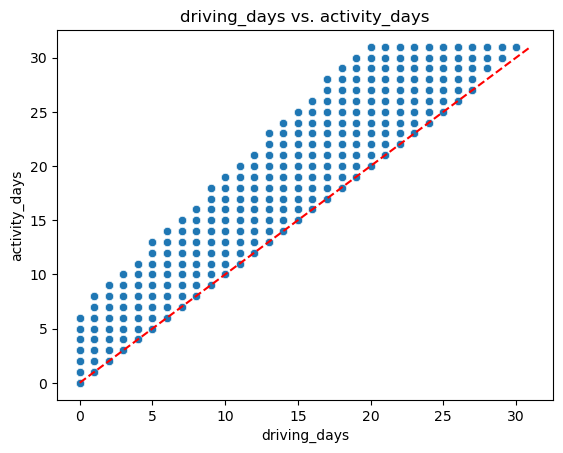

In [37]:
# Scatter plot for variables `driving_days` and `activity_days`
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

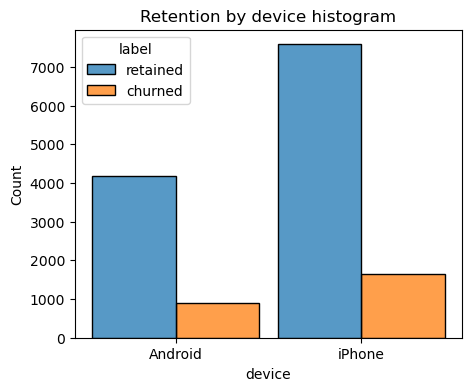

In [38]:
# Plot a histogram that has four bars—one for each device-label combination—to show how many iPhone users were retained/churned and how many Android users were retained/churned.
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

In [39]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [40]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers per drive day. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

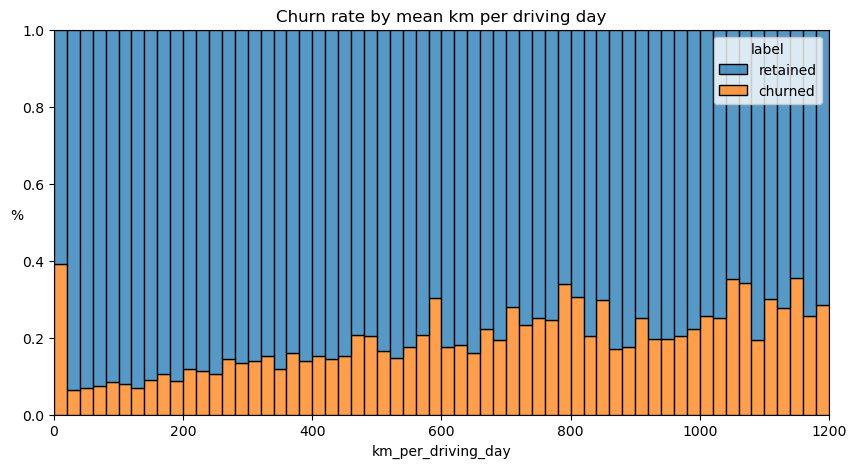

In [41]:
# Plot a histogram of the new `km_per_driving_day` column
plt.figure(figsize=(10,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases.

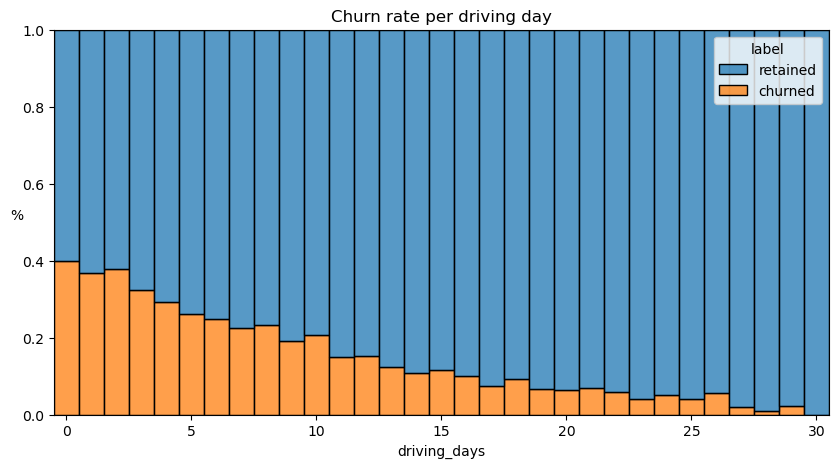

In [42]:
# histogram for churn rate per number of driving days
plt.figure(figsize=(10,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.
If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. 

In [43]:
# Create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [44]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Median: 0.4


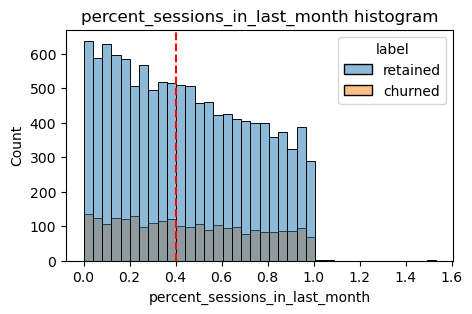

In [45]:
# histogram depicting the distribution of values in this new column
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

In [46]:
# median value of the n_days_after_onboarding variable
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

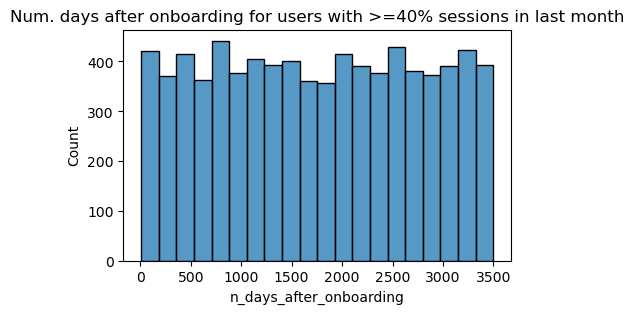

In [47]:
# Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

In [48]:
# write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. such as the 95th percentile of the distribution.
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [49]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [50]:
# validating the function
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


In [51]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,0.343134,0.809524


## **Statistical analysis**

In [52]:
from scipy import stats

In [53]:
# 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

# 2. Create new `device_type` column
df['device_type'] = df['device']

# 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [54]:
df.groupby('device_type')['drives'].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.

### **Hypothesis testing**
**Null hypothesis** ($H_0$): There is no difference in average number of drives between drivers who use iPhone and drivers who use Androids.  <br> 
**Alternative hypothesis** ($H_A$): There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

choosing 5% as the significance level and proceed with a two-sample t-test.

In [55]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.1643714136026293, pvalue=0.2442984426724222, df=11148.669519764011)

Since the p-value is larger than the chosen significance level (5%), you fail to reject the null hypothesis. You conclude that there is not a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

## **Regression Analysis**

In [56]:
# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [57]:
df = df.drop('ID', axis=1)

In [58]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [59]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   label                             14299 non-null  object 
 1   sessions                          14999 non-null  int64  
 2   drives                            14999 non-null  int64  
 3   total_sessions                    14999 non-null  float64
 4   n_days_after_onboarding           14999 non-null  int64  
 5   total_navigations_fav1            14999 non-null  int64  
 6   total_navigations_fav2            14999 non-null  int64  
 7   driven_km_drives                  14999 non-null  float64
 8   duration_minutes_drives           14999 non-null  float64
 9   activity_days                     14999 non-null  int64  
 10  driving_days                      14999 non-null  int64  
 11  device                            14999 non-null  object 
 12  km_p

In [61]:
# Drop rows with missing data in `label` column
df = df.dropna(subset=['label'])

In [62]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [63]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,1.429900e+04,14299.000000,1.429200e+04,14299.000000,14198.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.663233,1751.822505,114.562767,27.187216,3944.110515,1792.911210,15.544653,12.182530,inf,581.942399,inf,0.449837,0.860286,1.354850,0.173998
std,67.243178,55.127927,118.596924,1008.663834,124.378550,36.715302,2217.358063,1224.329759,9.016088,7.833835,NaN,1038.254509,NaN,0.286863,0.077141,0.478485,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,3.325389e+01,136.168003,1.800000e+00,0.196890,0.805212,1.000000,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,7.490594e+01,273.301012,4.666667e+00,0.424310,0.826087,1.000000,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,1.854667e+02,558.018761,1.220000e+01,0.687251,0.900000,2.000000,0.000000
max,243.000000,200.000000,454.363204,3500.000000,422.000000,124.000000,8889.794236,4668.180092,31.000000,30.000000,inf,15420.234110,inf,1.530637,1.000000,2.000000,1.000000


In [64]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [65]:
# Generate a correlation matrix
df.corr(method='pearson', numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type,professional_driver,label2
sessions,1.000000,0.996942,0.597299,0.007101,0.001858,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.321676,-0.011569,0.454513,0.614136,-0.356005,-0.012704,0.443654,0.034911
drives,0.996942,1.000000,0.595396,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.325440,-0.010989,0.455807,0.614282,-0.308124,-0.011684,0.444425,0.035865
total_sessions,0.597299,0.595396,1.000000,0.006615,0.000194,0.010363,0.001015,-0.000345,0.015757,0.012957,-0.194402,-0.016162,0.274758,-0.113455,-0.205398,-0.012133,0.254532,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006615,1.000000,-0.002450,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.004168,0.011764,-0.002340,-0.000874,0.000995,0.011299,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000194,-0.002450,1.000000,0.002866,-0.007365,0.005646,0.010902,0.010419,-0.005254,-0.000197,0.009056,0.015180,-0.020639,0.001316,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010363,-0.004968,0.002866,1.000000,0.003567,-0.003009,-0.004425,0.002000,0.002902,0.006751,0.002379,0.000603,0.003043,0.000275,0.007126,0.015032
driven_km_drives,0.002995,0.003445,0.001015,-0.004655,-0.007365,0.003567,1.000000,0.690547,-0.007445,-0.009550,0.227341,0.344765,0.013289,-0.002088,0.000507,0.002086,-0.000901,0.019771
duration_minutes_drives,-0.004545,-0.003889,-0.000345,-0.010167,0.005646,-0.003009,0.690547,1.000000,-0.007895,-0.009425,0.170689,0.239627,0.003930,-0.007884,0.019937,0.007709,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015757,-0.009418,0.010902,-0.004425,-0.007445,-0.007895,1.000000,0.947687,-0.005588,-0.397433,-0.413663,0.017840,-0.019597,0.010221,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012957,-0.007321,0.010419,0.002000,-0.009550,-0.009425,0.947687,1.000000,-0.004337,-0.407917,-0.428643,0.013550,-0.016645,0.003859,0.469776,-0.294259


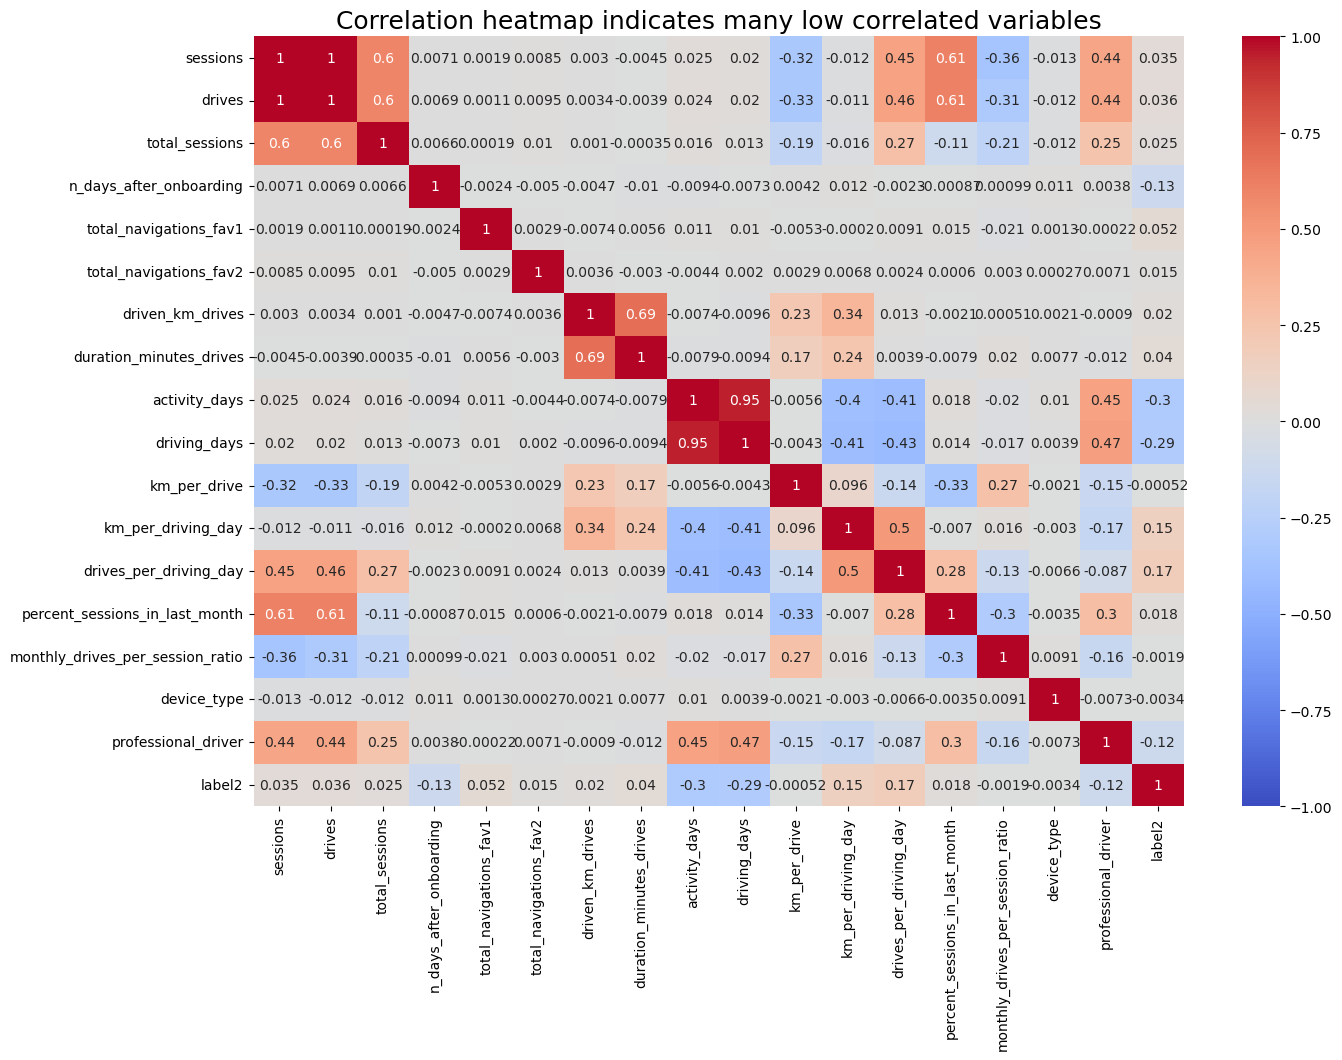

In [66]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

#### **variables that are multicollinear with each other**
> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

In [67]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1
